In [1]:
from qiskit import *

In [3]:
from qiskit.tools.visualization import plot_histogram as hst

In [4]:
%matplotlib inline 

In [41]:
secretnumber = '11000111'

In [42]:
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))
circuit.h(range(len(secretnumber)))

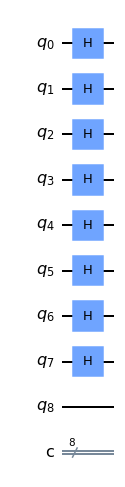

In [43]:
circuit.draw(output = 'mpl')

In [44]:
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

In [45]:
circuit.barrier()

In [55]:
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

In [56]:
circuit.barrier()

In [57]:
circuit.h(range(len(secretnumber)))

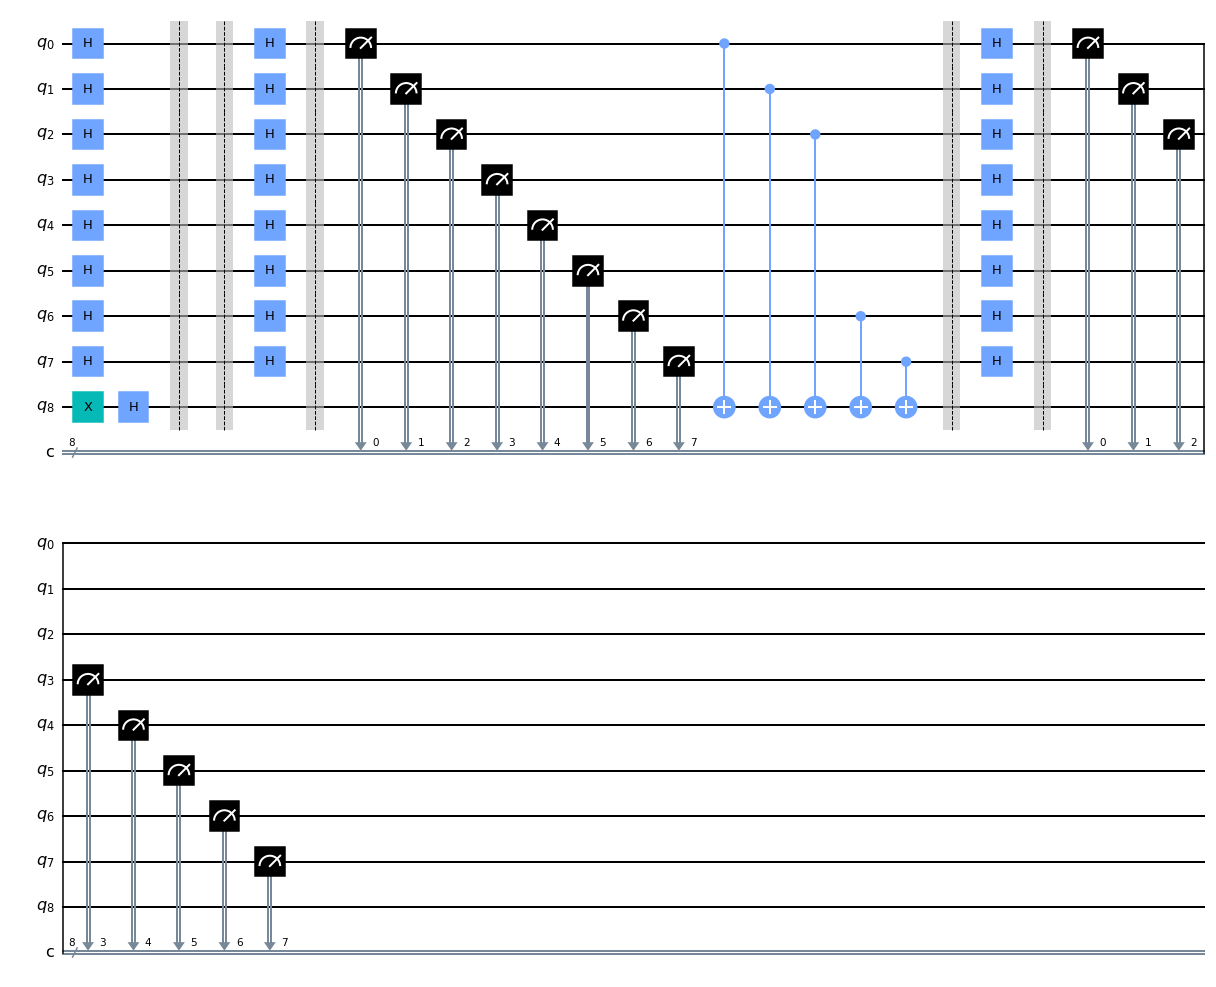

In [58]:
circuit.barrier()
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))
circuit.draw(output = 'mpl')

In [59]:
simulator = Aer.get_backend('qasm_simulator')

In [60]:
result = execute(circuit, backend = simulator, shots = 1).result()

In [61]:
counts = result.get_counts()

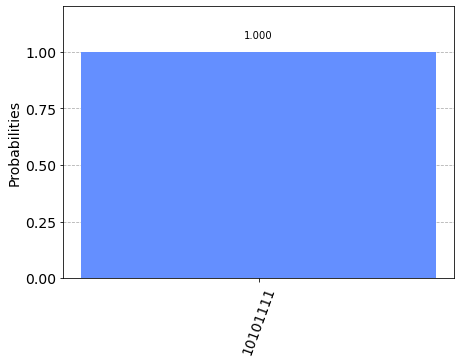

In [62]:
hst(counts)

In [63]:
print(counts)

{'10101111': 1}
